In [92]:
from neural_priors.utils.data import Subject

In [93]:
sub = Subject('alina')

In [94]:
paradigm = sub.get_behavioral_data(tasks=['estimation_task', ])['n']

In [98]:
    paradigm = sub.get_behavioral_data(tasks=['estimation_task', ])['n'].droplevel(['subject', 'task', -1])

In [99]:
paradigm

run
1    19.0
1    18.0
1    13.0
1    18.0
1    20.0
     ... 
8    19.0
8    38.0
8    37.0
8    13.0
8    17.0
Name: n, Length: 240, dtype: float64

In [87]:
sub.get_single_trial_estimates(1, smoothed=False)

In [8]:
masker = sub.get_brain_mask()

data = masker.fit_transform(sub.get_single_trial_estimates(1, smoothed=True))

In [24]:
paradigm = sub.get_behavioral_data(tasks=['estimation_task', ])['n'].xs(slice(2, None), 0, 'run')

In [25]:
from braincoder.models import LogGaussianPRF

from braincoder.optimize import ParameterFitter
import numpy as np

In [26]:
model = LogGaussianPRF()

In [47]:
mus = np.linspace(5, 80, 30, dtype=np.float32)
sds = np.linspace(5, 40, 30, dtype=np.float32)
amplitudes = np.array([1.], dtype=np.float32)
baselines = np.array([0], dtype=np.float32)

In [48]:
optimizer = ParameterFitter(model, data, paradigm.values)

grid_parameters = optimizer.fit_grid(mus, sds, amplitudes, baselines, use_correlation_cost=True)
grid_parameters = optimizer.refine_baseline_and_amplitude(grid_parameters, n_iterations=5)



Working with chunk size of 43
Using correlation cost!


  0%|          | 0/21 [00:00<?, ?it/s]

/Users/gdehol/git/braincoder/braincoder/optimize.py:409: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.11227126 0.21337952 0.14855257 ... 0.08069745 0.26990339 0.33748597]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  parameters.loc[ix] = new_parameters.loc[ix]


In [49]:
from braincoder.utils import get_rsq

In [50]:
pred = model.predict(paradigm, grid_parameters)
r2 = get_rsq(data, pred)

In [51]:
optimizer.fit(init_pars=grid_parameters, learning_rate=.05, store_intermediate_parameters=False, max_n_iterations=10000,
        r2_atol=0.00001)


Number of problematic voxels (mask): 0
Number of voxels remaining (mask): 73075


  0%|          | 0/10000 [00:00<?, ?it/s]

parameter,mu,sd,amplitude,baseline
unit,,,,
0,74.827583,5.000000,1.000000,0.171211
1,15.269423,2.008309,0.180916,-0.206955
2,74.827583,5.000000,1.000000,-0.125421
3,80.000000,5.000000,1.000000,0.090708
4,74.827583,5.000000,1.000000,0.280670
...,...,...,...,...
73070,39.467846,43.400696,0.418447,-0.318628
73071,38.167004,44.495880,0.723971,-0.896099
73072,74.827583,5.000000,1.000000,-0.132050


In [54]:
masker.inverse_transform(optimizer.r2).to_filename('/Users/gdehol/Downloads/r2.nii.gz')

In [60]:
masker.inverse_transform(optimizer.estimated_parameters['mu']).to_filename('/Users/gdehol/Downloads/mu.nii.gz')

Unexpected exception formatting exception. Falling back to standard exception


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_52644/3267112612.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r2)
/Users/gdehol/mambaforge/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_52644/3267112612.py", line 3, in <module>
    sns.distplot(r2)
  File "

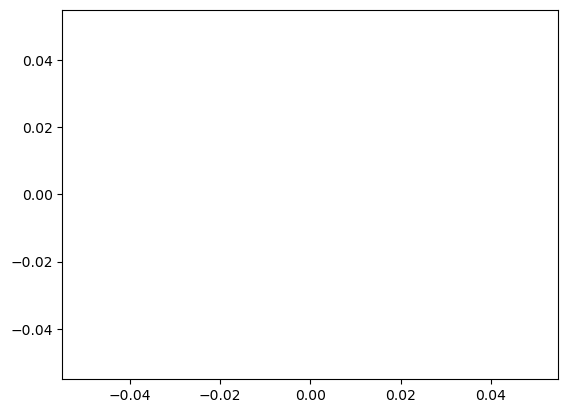

In [44]:
import seaborn as sns

sns.distplot(r2)

In [8]:
!ls /data/ds-neuralpriors/derivatives/glm_stim1.denoise.smoothed/sub-alina/ses-1/func/

TYPED_FITHRF_GLMDENOISE_RR.npy
sub-alina_ses-1_task-task_space-T1w_desc-R2.nii.gz
sub-alina_ses-1_task-task_space-T1w_desc-response_pe.nii.gz
sub-alina_ses-1_task-task_space-T1w_desc-stim_pe.nii.gz
